# Analyze Inference

* Read predictions csv file
* Calculate metrics
* Create histograms and graphs

### Setup

In [21]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from typing import List

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

sns.set_style("white")
label_replacements = {
    'av': {
        'c2i': {'N': 0, 'L': 1, 'A': 2, 'P': 3},
        'i2c': {0: 'N', 1: 'L', 2: 'A', 3: 'P'}
    },
    'ac': {
        'c2i': {'L': 0, 'H': 1},
        'i2c': {0: 'L', 1: 'H'}
    },
    'pr': {
        'c2i': {'L': 0, 'H': 1, 'N': 2},
        'i2c': {0: 'L', 1: 'H', 2: 'N'}
    },
    'ui': {
        'c2i': {'R': 0, 'N': 1},
        'i2c': {0: 'R', 1: 'N'}
    },
    's': {
        'c2i': {'C': 0, 'U': 1},
        'i2c': {0: 'C', 1: 'U'}
    },
    'c': {
        'c2i': {'H': 0, 'N': 1, 'L': 2},
        'i2c': {0: 'H', 1: 'N', 2: 'L'}
    },
    'i': {
        'c2i': {'H': 0, 'N': 1, 'L': 2},
        'i2c': {0: 'H', 1: 'N', 2: 'L'}
    },
    'a': {
        'c2i': {'H': 0, 'N': 1, 'L': 2},
        'i2c': {0: 'H', 1: 'N', 2: 'L'}
    }
}

In [23]:
model = "distilbert-desc"
dataset = "descriptions_only"

distil_c = "#f2a35e"
small_c = "#3958e3"
medium_c = "#ad1a9f"
if model == "bert-medium":
    color = medium_c
elif model == "bert-small":
    color = small_c
elif model == "distilbert":
    color = distil_c
elif model == "distilbert-desc":
    color = distil_c

df = pd.read_csv(f'results/predictions_{model}_on_{dataset}.csv')
df.shape

(22245, 21)

### Metrics

In [24]:
correct_rows = df[df['score'] == df['predicted_score']]
len(correct_rows)

13730

In [25]:
wrong_rows = df[df['score'] != df['predicted_score']]
len(wrong_rows)

8515

In [26]:
ges = len(correct_rows) + len(wrong_rows)
ges

22245

In [27]:
len(correct_rows) / ges

0.6172173522139807

In [28]:
pred_bigger = df[df['score'] < df['predicted_score']]
pred_lower = df[df['score'] > df['predicted_score']]

In [29]:
print(len(pred_bigger) / len(df))
print(len(pred_lower)  / len(df))

0.21402562373567094
0.1687570240503484


In [30]:
df['score_diff'] = df['score'] - df['predicted_score']
df['score_diff'] = df['score_diff'].abs()

In [31]:
np.max(df['score_diff'])

9.9

In [32]:
len(df[df['score_diff'] == np.max(df['score_diff'])])

1

In [33]:
np.std(df['score_diff'])

1.014697560137636

In [34]:
is_null = df[df['predicted_score'] == 0.0]
len(is_null)

78

In [35]:
print(f"50th percentile: {np.percentile(df['score_diff'], 50)}")
print(f"75th percentile: {np.percentile(df['score_diff'], 75)}")
print(f"90th percentile: {np.percentile(df['score_diff'], 90)}")
print(f"95th percentile: {np.percentile(df['score_diff'], 95)}")
print(f"99th percentile: {np.percentile(df['score_diff'], 99)}")

50th percentile: 0.0
75th percentile: 1.0
90th percentile: 2.2
95th percentile: 2.5999999999999996
99th percentile: 4.300000000000001


### Graphs and Histograms

#f2a35e


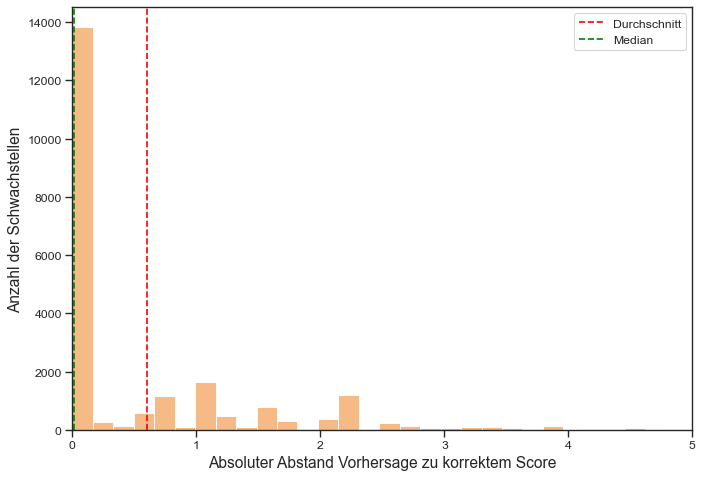

In [36]:
sns.set_style("ticks")
plt.figure(figsize=(10,7), dpi= 80)
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
print(color)
ax = sns.histplot(df['score_diff'], bins=60, color=color)
ax.set_xlim(0, 5)
plt.xlabel('Absoluter Abstand Vorhersage zu korrektem Score', fontsize=14)
plt.ylabel('Anzahl der Schwachstellen', fontsize=14)
ax.axvline(x=np.average(df['score_diff']), color='red', linestyle='--', label='Durchschnitt')
ax.axvline(x=np.median(df['score_diff'])+0.01, color='green', linestyle='--', label='Median')
ax.legend()
plt.savefig(f'../assets/{model}_{dataset}_score_diff.png')
plt.show()

In [37]:
np.average(df['score_diff'])

0.603794111036188

In [38]:
df

,Unnamed: 0,id,text,av,ac,pr,ui,s,c,i,...,predicted_av,predicted_ac,predicted_pr,predicted_ui,predicted_s,predicted_c,predicted_i,predicted_a,predicted_score,score_diff
0,0,CVE-2016-0003,Microsoft Edge allows remote attackers to exec...,N,L,N,R,C,H,H,...,N,H,N,R,U,H,H,H,7.5,2.1
1,1,CVE-2016-0008,The graphics device interface in Microsoft Win...,N,L,N,R,U,L,N,...,N,L,N,N,U,L,H,N,8.2,3.9
2,2,CVE-2016-0012,"Microsoft Office 2007 SP3, Excel 2007 SP3, Pow...",N,L,N,R,U,L,N,...,N,L,N,R,U,L,H,N,7.1,2.8
3,3,CVE-2016-0018,"Microsoft Windows 7 SP1, Windows 8, Windows 8....",L,L,L,R,U,H,H,...,L,L,L,N,U,H,H,H,7.8,0.5
4,4,CVE-2016-0022,"Microsoft Word 2007 SP3, Office 2010 SP2, Word...",L,L,N,R,U,H,H,...,L,L,N,R,U,H,H,H,7.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22240,22240,CVE-2021-46079,An Unrestricted File Upload vulnerability exis...,N,L,H,N,U,H,H,...,N,L,H,R,C,L,L,N,4.8,2.4
22241,22241,CVE-2021-46142,An issue was discovered in uriparser before 0....,L,L,N,R,U,N,N,...,N,L,N,R,U,N,N,H,6.5,1.0
22242,22242,CVE-2021-46146,An issue was discovered in MediaWiki before 1....,N,L,L,R,C,L,L,...,N,L,N,R,C,L,L,N,6.1,0.7
22243,22243,CVE-2021-46150,An issue was discovered in MediaWiki before 1....,N,L,H,R,C,L,L,...,N,L,N,R,C,L,L,N,6.1,1.3


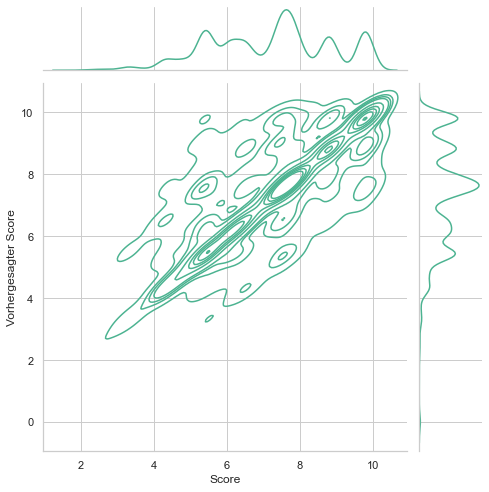

In [39]:
sns.set_theme(style="whitegrid")

s = sns.jointplot(x=df['score'], y=df['predicted_score'], kind="kde", color="#4CB391", height=7                  )
s.set_axis_labels('Score', 'Vorhergesagter Score')
fig = s.fig
#fig.savefig(f'../assets/hist_distil_scores.png', facecolor=fig.get_facecolor(), edgecolor='none')

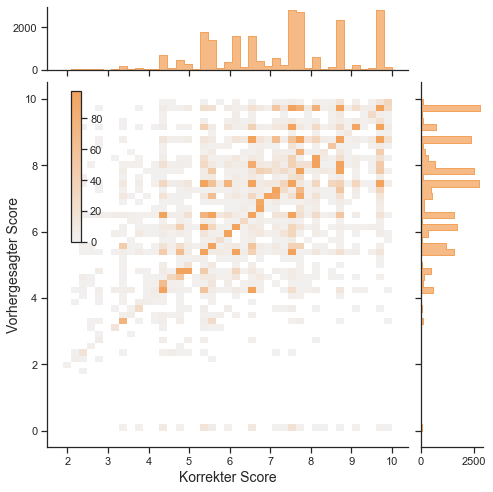

In [40]:

sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
g = sns.JointGrid(data=df, x="score", y="predicted_score", marginal_ticks=True, height=7)

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .5, .02, .3])



# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(False, False),
    cmap=f"light:{color}", pmax=.3, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color=color)

fig = g.fig
g.set_axis_labels('Korrekter Score', 'Vorhergesagter Score', fontsize=14)
fig.savefig(f'../assets/hist_{model}_{dataset}_scores.png', facecolor=fig.get_facecolor(), edgecolor='none')